# Practical session 2 - Practise with classic libraries

Students (pair):
- [Gabriel Gozlan](https://github.com/GabrielGozlan)
- [Rakel Ouakil](https://github.com/RakelOuakil)

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [105]:
%load_ext autoreload
%autoreload 2

## Imports

In [141]:
from typing import List
import numpy as np
import secrets
import os
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.special as sps

import pandas as pd
from IPython.display import display
import ipytest



In [107]:
LAB_DIR = Path(os.getcwd())

## Global I/O

In [108]:
def save_fig_as_png(filename: str) -> None:
    """
    Parameters
    ----------
    filename : str

    Returns
    -------
        None
    """
    if os.path.exists(LAB_DIR / filename):
        print("PNG already exists !")
        return None
    else:
        plt.savefig(LAB_DIR / filename, dpi=300)
        return None


In [109]:
# Save vector in .npy

def save_vector_as_npy(vector: np.ndarray, filename: str = "sample.npy") -> None:
    """
    Parameters
    ----------
    vector : np.ndarray
    filename : str

    Returns
    -------
        None
    """
    if os.path.exists(LAB_DIR / filename):
        print("File already exists !")
        return None
    else:
        with open(LAB_DIR / filename, "wb") as f:
            np.save(f, vector)
    print("File saved successfully !")
    return None


In [111]:
def load_npy_vector(filename: str = "sample.npy") -> np.ndarray | None:
    """
    Parameters
    ----------
    filename : str

    Returns
    -------
    vector: np.ndarray | None
    """
    if not os.path.exists(LAB_DIR / filename):
        print("File doesn't exist !")
        return None
    else:
        with open(LAB_DIR / filename, "rb") as f:
            vector = np.load(f)
    print("Vector loaded !")
    return vector

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

First, we generate an arbitrary 128-bits integer with secrets.randbits (it's the random seed).


In [112]:
# secrets.randbits(128)


In [113]:
random_seed = 261760519584560275253684893175904508885 # generated with secrets.randbits
rng = np.random.default_rng(seed=random_seed)


In [114]:
# Check the reproductibility

rng = np.random.default_rng(seed=random_seed)
rd1 = rng.random()
print(rd1)

# reinitialize class
rng = np.random.default_rng(seed=random_seed)
rd2 = rng.random()
print(rd2)

print(rd1 == rd2)


0.6347800226513781
0.6347800226513781
True


In [115]:
# Without seed there is no reproductibility

rng = np.random.default_rng()
rd1 = rng.random()
print(rd1)

# reinitialize class
rng = np.random.default_rng()
rd2 = rng.random()
print(rd2)

print(rd1 == rd2)



0.10874688178907643
0.9441672810973948
False


In [116]:
rng = np.random.default_rng(seed=random_seed) # for the next questions

2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

The pdf of Gamma distribution in numpy doc :

$$
p(x) = \frac{x^{k-1} e^{-x/\theta}}{\theta^k \, \Gamma(k)},
$$

so by identification : $\theta = 1 / \beta = 0.5$ and $k = alpha = 9$
with $\theta$ the scale and $k$ the shape.


In [117]:
shape, scale = 9, 0.5

random_gamma_vector = rng.gamma(shape, scale, 10 ** 5)

# the pdf values are >= 0 because x >= 0
print(all(random_gamma_vector >= 0))
print(random_gamma_vector.shape == (10 ** 5, ))



True
True


In [118]:
save_vector_as_npy(vector=random_gamma_vector)


File already exists !


In [119]:
gamma_vector = load_npy_vector()
gamma_vector

Vector loaded !


array([4.54115904, 3.10138672, 1.9818431 , ..., 5.33987184, 3.87866832,
       6.110993  ], shape=(100000,))

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

In [120]:
def plot_gamma_distrib_histogram(gamma_vector: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Parameters
    ----------
    gamma_vector : np.ndarray

    Returns
    -------
    count, bins : tuple[np.ndarray, np.ndarray]
    """
    count, bins, patches = plt.hist(
        gamma_vector,
        bins=63,
        density=True,
        alpha=0.6,
        label="Empirical histogram"
    )
    plt.title(f"Histogram of random gamma vector values (size {gamma_vector.shape[0]})")
    plt.xlabel("Values")
    plt.ylabel("Normalized density")
    return count, bins

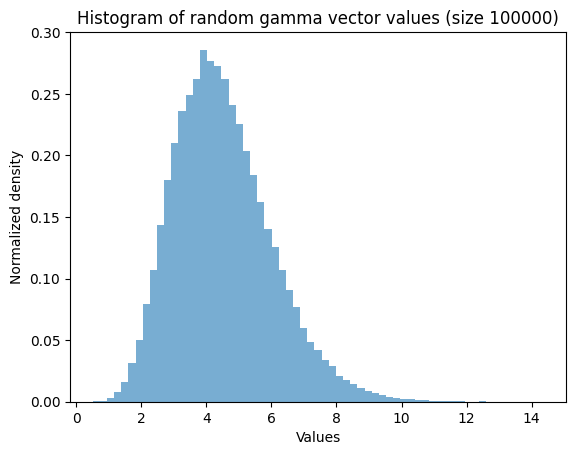

In [121]:
count, bins = plot_gamma_distrib_histogram(gamma_vector=gamma_vector)
plt.show()

In [122]:
# Make sure the histogram is a pdf

# We know the function is continuous (then mesurable)

print(np.all(count >= 0)) # density values must be >= 0

# finally, we can verify the integer of the pdf for x>=0 equals approximately 1.
integral = np.sum(count * np.diff(bins)) # Integral of the PDF ≈ sum over bins of height * width
print(integral)
print(np.isclose(integral, 1.0, atol=1e-2))


True
0.9999999999999998
True


4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

In [123]:
def gamma_pdf_function(x: np.ndarray, scale: float = 0.5, shape: float = 9.) -> np.ndarray:
    """
    Parameters
    ----------
    x : np.ndarray
    scale : float
    shape : float

    Returns
    -------
        np.ndarray
    """
    return x**(shape-1)*(np.exp(-bins/scale) /  (sps.gamma(shape)*scale**shape)) # numpy formula for gamma pdf


PNG already exists !


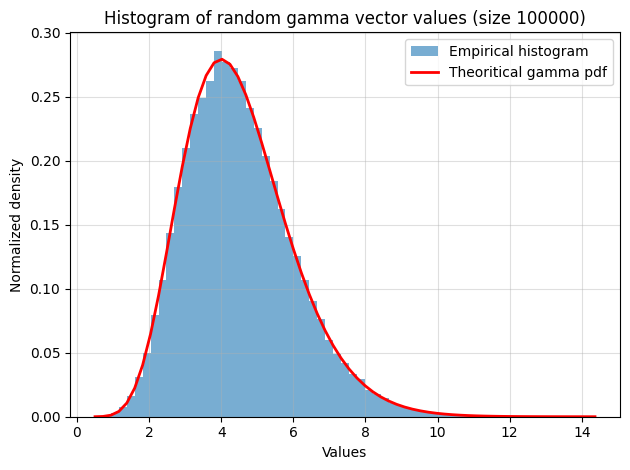

In [124]:
count, bins = plot_gamma_distrib_histogram(gamma_vector=gamma_vector)

y = gamma_pdf_function(x=bins) # we evaluate the pdf on the points of bins

plt.plot(bins, y, "r-", linewidth=2, label="Theoritical gamma pdf")
plt.legend()
plt.grid(alpha=0.4)
plt.tight_layout()

save_fig_as_png(filename="histogram.png") # save figure as png


plt.show()

As expected, the empirical histogram aligns well with his theoretical gamma probability density function.


---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [125]:
df = pd.read_csv("data/data.csv")
display(df)

,X,Y
0,190,24
1,128,28
2,180,24
3,212,19
4,56,37
5,192,22
6,68,34
7,98,25
8,110,36
9,197,24


In [126]:
stats = pd.DataFrame({
    "mean": df.mean(),
    "median": df.median(),
    "variance": df.var(),
    "std_dev": df.std()
})

display(stats)

,mean,median,variance,std_dev
X,153.750000,180.5,3486.022727,59.042550
Y,25.916667,24.0,42.446970,6.515134


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [127]:
X = df["X"]
y = df["Y"]
a, b = np.polyfit(X, y, 1) # linear regression in 2D

print("Y = a * X + b with")
print(f"slope : {a} and intercept : {b}")

Y = a * X + b with
slope : -0.09816474883463173 and intercept : 41.0094967999913


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

PNG already exists !


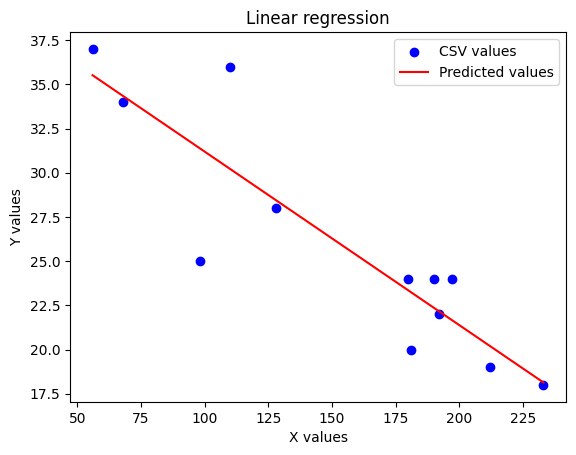

In [128]:
# sort X values
X_sorted = np.sort(X)
y_pred = a * X_sorted + b

plt.scatter(X, y, label="CSV values", color="blue")
plt.plot(X_sorted, y_pred, label="Predicted values", color="red")

plt.title("Linear regression")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend()

save_fig_as_png(filename="regression_line.png") # save figure as png

plt.show()


---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [129]:
def gradient2D(X: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Implementation of the 2D discrete gradient operator D applied to a matrix.

    Computes the discrete gradient D(X) = (XD_h, D_v X) where:
    - XD_h: horizontal differences with zero-padding
    - D_v X: vertical differences with zero-padding

    Parameters
    ----------
    X : np.ndarray of shape (M, N)
        Input 2D matrix (real or complex).

    Returns
    -------
    XD_h : np.ndarray of shape (M, N)
        Horizontal component: [x_2-x_1, ..., x_N-x_{N-1}, 0_M]
    D_vX : np.ndarray of shape (M, N)
        Vertical component: [x̃_2^T-x̃_1^T, ..., x̃_M^T-x̃_{M-1}^T, 0_N]^T

    Raises
    ------
    AssertionError
        If X has more than 2 dimensions.
    """
    if len(X.shape) > 2:
        raise AssertionError("X must be 2D")

    XD_h = np.c_[np.diff(X, axis=1), np.zeros((X.shape[0], 1))]
    D_vX = np.r_[np.diff(X, axis=0), np.zeros((1, X.shape[1]))]
    return (XD_h, D_vX)


2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [130]:
def test_gradient2D():
    A = np.array([[1+1j, 1-1j], [-1+1j, -1-1j]])
    B = np.array([[1+1j, 1-1j], [-1+1j, -1-1j], [1+2j, 1-2j]])

    C = np.ones((2, 2))
    D = np.c_[C, np.ones((2, 1))]

     # square non-constant matrix case
    result_with_A = gradient2D(A)
    assert isinstance(result_with_A, tuple)
    assert len(result_with_A) == 2
    assert result_with_A[0].shape == (2,2)
    assert result_with_A[1].shape == (2,2)

     # non-square non-constant matrix case
    result_with_B = gradient2D(B)
    assert isinstance(result_with_B, tuple)
    assert len(result_with_B) == 2
    assert result_with_B[0].shape == (3,2)
    assert result_with_B[1].shape == (3,2)

    # square constant matrix case
    result_with_C = gradient2D(C)
    assert np.all(result_with_C[0] == 0)
    assert np.all(result_with_C[1] == 0)

    # non-square constant matrix case
    result_with_D = gradient2D(D)
    assert np.all(result_with_D[0] == 0)
    assert np.all(result_with_D[1] == 0)

ipytest.run("-k test_gradient2D")


..                                                                                           [100%]
2 passed, 2 deselected in 0.05s


<ExitCode.OK: 0>

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

Docstring created in Q1, with the numpy convention.

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [131]:
def tv(X: np.ndarray) -> float:
    """
    Compute the discrete isotropic total variation of a matrix.

    The total variation is defined as:
    TV(X) = sum_{m,n} sqrt(|[XD_h]_{m,n}|² + |[D_v X]_{m,n}|²)

    where (XD_h, D_vX) is the discrete gradient operator computed by gradient2D.

    Parameters
    ----------
    X : np.ndarray of shape (M, N)
        Input 2D matrix (real or complex).

    Returns
    -------
    float
        The total variation value of matrix X.

    Raises
    ------
    AssertionError
        If X has more than 2 dimensions.
    """
    XD_h, D_vX = gradient2D(X)
    return np.sum(np.sqrt(np.abs(XD_h)**2 + np.abs(D_vX)**2))

In [132]:
def test_tv():
    A = np.array([[1+1j, 1-1j], [-1+1j, -1-1j], [1+2j, 1-2j]])
    B = np.ones((2, 2))

    # in that case : tv = sqrt(1² + 2²) + sqrt(0² + 2²) + sqrt(1² + 0²) + sqrt(0² + 0²)
    C = np.array([[1, 2], [3, 4]])


    result_with_A = tv(A)
    assert isinstance(result_with_A, float)

    result_with_B = tv(B)
    assert result_with_B == 0. # because gradient_2d = (0, 0) in that case (B constant)

    result_with_C = tv(C)
    assert np.isclose(result_with_C, np.sqrt(5) + 3, atol=1e-2)


ipytest.run("-k test_tv")


.                                                                                            [100%]
1 passed, 3 deselected in 0.02s


<ExitCode.OK: 0>

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [133]:
def gradient2D_adjoint(Y: tuple[np.ndarray, np.ndarray]) -> np.ndarray:
    """
    Compute the adjoint of the 2D gradient operator gradient2D.

    Parameters
    ----------
    Y : tuple of np.ndarray of shape (M, N)

    Returns
    -------
    np.ndarray
        the adjoint of the 2D gradient operator.
    """
    Y_h, Y_v = Y
    m, n = Y_h.shape

    # Y_h_D_h*
    if n == 1:
        Y_h_D_h_star = np.zeros_like(Y_h)
    else:
        first_col = -Y_h[:, 0:1]
        if n > 2:
            # compute -(Y[:, j] - Y[:, j-1]) for j=1..n-2
            middle_cols = -(Y_h[:, 1:n-1] - Y_h[:, 0:n-2])
            last_col = Y_h[:, n-2:n-1]
            Y_h_D_h_star = np.c_[first_col, middle_cols, last_col]
        else:  # n == 2
            last_col = Y_h[:, 0:1]
            Y_h_D_h_star = np.c_[first_col, last_col]

    # D_v* Y_v
    if m == 1:
        D_v_star_Y_v = np.zeros_like(Y_v)
    else:
        first_row = -Y_v[0:1, :]
        if m > 2:
            # compute -(Y[i, :] - Y[i-1, :]) for i=1..m-2
            middle_rows = -(Y_v[1:m-1, :] - Y_v[0:m-2, :])
            last_row = Y_v[m-2:m-1, :]
            D_v_star_Y_v = np.r_[first_row, middle_rows, last_row]
        else:  # m == 2
            last_row = Y_v[0:1, :]
            D_v_star_Y_v = np.r_[first_row, last_row]

    return Y_h_D_h_star + D_v_star_Y_v


6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^T \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).
> `np.conj` is useful.

**Answer**:

In [137]:
def compute_matrices_scalar_product(U: np.ndarray, V: np.ndarray) -> complex:
    """
    Compute the Hermitian inner product of two matrices.

    <U, V> = trace(conj(U^T) × V) = sum(conj(U) * V)

    Parameters
    ----------
    U : np.ndarray of shape (M, N)
        Input 2D matrix (real or complex).
    V : np.ndarray of shape (M, N)
        Input 2D matrix (real or complex).

    Returns
    -------
    complex
        The Hermitian inner product of U and V.

    Raises
    ------
    AssertionError
        If U and V have different shapes or are not 2D.
    """
    if len(U.shape) != 2 or len(V.shape) != 2:
        raise AssertionError("U and V must be 2D")
    if U.shape != V.shape:
        raise AssertionError("U and V must be the same shape")

    return np.sum(np.conj(U) * V)


def compute_scalar_product_with_grad_adjoint(X: np.ndarray, Y: tuple[np.ndarray, np.ndarray]) -> complex:
    """
    Compute <X, D*(Y)> where D* is the adjoint of the 2D gradient operator.

    Parameters
    ----------
    X : np.ndarray of shape (M, N)
        Input 2D matrix (real or complex).
    Y : tuple of np.ndarray of shape (M, N)
        Tuple containing (Y_h, Y_v) components.

    Returns
    -------
    complex
        The Hermitian inner product <X, D*(Y)>.
    """
    grad_adjoint = gradient2D_adjoint(Y)
    return compute_matrices_scalar_product(X, grad_adjoint)


def compute_scalar_product_with_grad(X: np.ndarray, Y: tuple[np.ndarray, np.ndarray]) -> complex:
    """
    Compute <D(X), Y> where D is the 2D gradient operator.

    Parameters
    ----------
    X : np.ndarray of shape (M, N)
        Input 2D matrix (real or complex).
    Y : tuple of np.ndarray of shape (M, N)
        Tuple containing (Y_h, Y_v) components.

    Returns
    -------
    complex
        The Hermitian inner product <D(X), Y>.
    """
    XD_h, D_vX = gradient2D(X)
    Y_h, Y_v = Y

    scalar_h = compute_matrices_scalar_product(XD_h, Y_h)
    scalar_v = compute_matrices_scalar_product(D_vX, Y_v)
    return scalar_h + scalar_v

In [138]:
random_seed = 261760519584560275253684893175904508885 # same seed as above
rng = np.random.default_rng(seed=random_seed)


In [140]:
def test_gradient2D_adjoint():
    for m in range(1, 4):
        for n in range(1, 4):
            X = rng.random((m, n)) + 1j * rng.random((m, n))

            Y_h = rng.random((m, n)) + 1j * rng.random((m, n))
            Y_v = rng.random((m, n)) + 1j * rng.random((m, n))
            Y = (Y_h, Y_v)

            scalar_with_grad = compute_scalar_product_with_grad(X, Y)
            scalar_with_adjoint = compute_scalar_product_with_grad_adjoint(X, Y)

            assert isinstance(scalar_with_grad, complex)
            assert isinstance(scalar_with_adjoint, complex)
            assert np.allclose(scalar_with_grad, scalar_with_adjoint)


ipytest.run("-k test_gradient2D_adjoint")


.                                                                                            [100%]
1 passed, 3 deselected in 0.03s


<ExitCode.OK: 0>

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
\begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [149]:
def gradientND(X: np.ndarray) -> List[np.ndarray]:
    """
    Compute N-dimensional gradient

    Parameters
    ----------
    X : np.ndarray of shape (N1, ..., Np)

    Returns
    -------
        List[np.ndarray]
    """
    gradients = []

    for axis in range(X.ndim):
        diff_result = np.diff(X, axis=axis)

        padding_shape = list(X.shape)
        padding_shape[axis] = 1
        zeros = np.zeros(padding_shape)

        gradient_axis = np.concatenate([diff_result, zeros], axis=axis)
        gradients.append(gradient_axis)

    return gradients



In [151]:
def test_gradientND():
    for m in range(1, 5):
        for n in range(1, 5):
            for d in range(1, 5):
                A = np.ones((m, n, d))

                result = gradientND(A)
                assert isinstance(result, list)
                assert len(result) == 3
                assert result[0].shape == (m, n)
                assert result[1].shape == (m, n)
                assert result[1].shape == (m, n)


ipytest.run("-k test_gradientND_with_gradient2D_test")


.                                                                                            [100%]
1 passed, 5 deselected in 0.03s


<ExitCode.OK: 0>

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
